In [2]:
#import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout , Flatten , Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#set the path to the main dir
import os 
main_dir = os.getcwd()+'\mydata'
print(main_dir)
os.listdir(main_dir)

E:\major project\mydata


['.ipynb_checkpoints',
 'checkpoint',
 'coursera dataset model',
 'covid',
 'covid1.jpg',
 'COVID19(200).jpg',
 'normal',
 'saved model for mydata',
 'savedmodelformydata(60epochs)',
 'test',
 'train',
 'validation']

In [6]:
#set the path to the train dir
train_dir = os.path.join(main_dir+'\\train')
#set the path to the test dir
os.listdir(train_dir)

['COVID', 'NORMAL']

In [7]:
#set the path to the test dir
test_dir = os.path.join(main_dir+'\\test')
#set the path to the test dir
os.listdir(test_dir)

['COVID', 'NORMAL']

In [8]:
#directory with the training covid images
train_covid_dir = os.path.join(train_dir+'\\COVID')
#directory with the training normal images
train_normal_dir = os.path.join(train_dir+'\\NORMAL')
print(train_covid_dir)


E:\major project\mydata\train\COVID


In [9]:

#directory with the testing covid images
test_covid_dir = os.path.join(test_dir+'\\COVID')
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir+'\\NORMAL')
# os.listdir(test_covid_dir)
print(test_covid_dir)

E:\major project\mydata\test\COVID


In [10]:
# #print the filenames
# train_covid_names = os.listdir(train_covid_dir)
# print(train_covid_names[:10])

# train_normal_names = os.listdir(train_normal_dir)
# print(train_normal_names[:10])

# test_covid_names = os.listdir(test_covid_dir)
# print(test_covid_names[:10])

# test_normal_names = os.listdir(test_normal_dir)
# print(test_normal_names[:10])



['COVID-1108.png', 'COVID-1138.png', 'COVID-1186.png', 'COVID-1189.png', 'COVID-1219.png', 'COVID-1233.png', 'COVID-1242.png', 'COVID-1246.png', 'COVID-1260.png', 'COVID-1266.png']
['Normal-100.png', 'Normal-1000.png', 'Normal-1001.png', 'Normal-1002.png', 'Normal-1003.png', 'Normal-1004.png', 'Normal-1005.png', 'Normal-1006.png', 'Normal-1007.png', 'Normal-1008.png']
['COVID-1000.png', 'COVID-1001.png', 'COVID-1002.png', 'COVID-1003.png', 'COVID-1004.png', 'COVID-1005.png', 'COVID-1006.png', 'COVID-1007.png', 'COVID-1008.png', 'COVID-1009.png']
['NORMAL2-IM-0485-0001.jpeg', 'NORMAL2-IM-0486-0001.jpeg', 'NORMAL2-IM-0487-0001.jpeg', 'NORMAL2-IM-0488-0001.jpeg', 'NORMAL2-IM-0489-0001.jpeg', 'NORMAL2-IM-0490-0001.jpeg', 'NORMAL2-IM-0491-0001.jpeg', 'NORMAL2-IM-0493-0001.jpeg', 'NORMAL2-IM-0496-0001.jpeg', 'NORMAL2-IM-0497-0001.jpeg']


In [11]:
#print the total no of images present in each dir
print("Total images present in the training set :", len(train_covid_names+train_normal_names))
print("Total images present in the testing set :", len(test_covid_names+test_normal_names))


Total images present in the training set : 4590
Total images present in the testing set : 1204


In [139]:
# Data Visualization

8
8


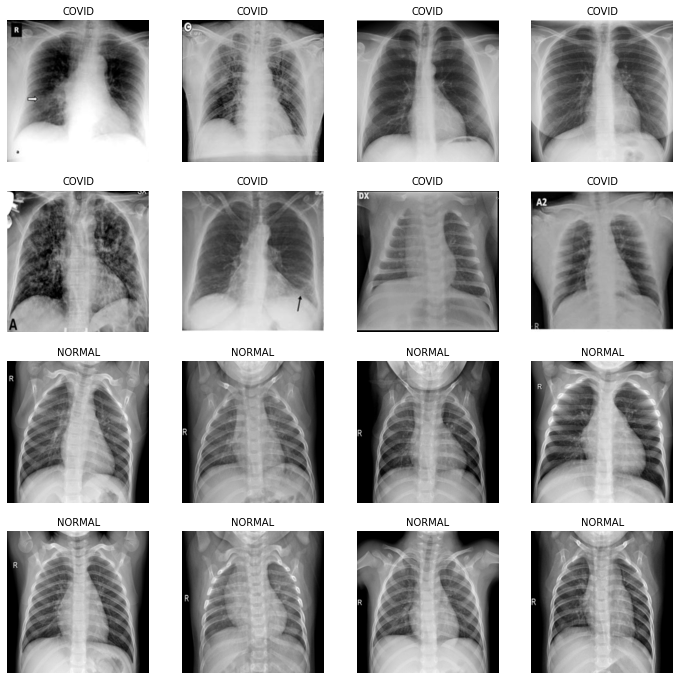

In [140]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
# import matplotlib.image as mping
# #set the number of columns and rows
# rows = 4
# cols = 4
# #set the figure size
# fig = plt.gcf()
# fig.set_size_inches(12,12)
# #get the filenames from the covid & normal dir of the train dataset
# covid_pic = [os.path.join(train_covid_dir,filename)for filename in train_covid_names[0:8]]
# normal_pic = [os.path.join(train_normal_dir,filename)for filename in train_normal_names[0:8]]
# #print the list
# print(len(covid_pic))
# print(len(normal_pic))
# #merge the covid and normal list
# merged_list = covid_pic+normal_pic
# for i , img_path in enumerate(merged_list):
#   data = img_path.split('\\',6)[4]
#   sp = plt.subplot(rows,cols,i+1)
#   sp.axis('off')
#   img = mping.imread(img_path)
#   sp.set_title(data,fontsize = 10)
#   plt.imshow(img,cmap = 'gray')


In [141]:
# Data Preprocessing and Augmentation

In [29]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split=0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale=1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                target_size = (256,256),
                                                subset = 'training',
                                                batch_size = 32,
                                                class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                target_size = (256,256),
                                                subset = 'validation',
                                                batch_size = 32,
                                                class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                                target_size = (256,256),
                                                batch_size = 32,
                                                class_mode = 'binary')



Found 3672 images belonging to 2 classes.
Found 918 images belonging to 2 classes.
Found 1203 images belonging to 2 classes.


In [47]:
#get the class indices
# train_generator.class_indices
validation_generator.class_indices


{'COVID': 0, 'NORMAL': 1}

In [144]:
#get the image shape
train_generator.image_shape


(256, 256, 3)

In [145]:
# Build CNN

In [146]:
model = Sequential()
#add convolution layer
#filters , size of filters , padding , activation functon , input shape
model.add(Conv2D(32,(5,5),padding = 'SAME',activation = 'relu' ,input_shape = (150,150,3)))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#dropout layer
model.add(Dropout(0.5))
#add another convolution layer
model.add(Conv2D(32,(5,5),padding = 'SAME',activation = 'relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#dropout layer
model.add(Dropout(0.5))
model.add(Conv2D(32,(5,5),padding = 'SAME',activation = 'relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#dropout layer
model.add(Dropout(0.5))
#flatten layer
model.add(Flatten())
#add dense layer : amount of nodes , activation
model.add(Dense(256,activation='relu'))
#dropout layer
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      25632     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 64, 64, 32)       

In [147]:
# Compile and Train Model

In [148]:
#compile model
model.compile(Adam(learning_rate=0.001),loss = 'binary_crossentropy', metrics =['accuracy'])

In [149]:
#train model
history = model.fit(train_generator,
                   epochs = 60,
                   validation_data = validation_generator)


Epoch 1/60
144/144 [==============================] - 540s 4s/step - loss: 0.8793 - accuracy: 0.5081 - val_loss: 0.6904 - val_accuracy: 0.8105
Epoch 2/60
144/144 [==============================] - 513s 4s/step - loss: 0.6638 - accuracy: 0.6033 - val_loss: 0.4498 - val_accuracy: 0.9002
Epoch 3/60
144/144 [==============================] - 493s 3s/step - loss: 0.5834 - accuracy: 0.7135 - val_loss: 0.5042 - val_accuracy: 0.8446
Epoch 4/60
144/144 [==============================] - 492s 3s/step - loss: 0.5364 - accuracy: 0.7405 - val_loss: 0.4267 - val_accuracy: 0.8761
Epoch 5/60
144/144 [==============================] - 495s 3s/step - loss: 0.5104 - accuracy: 0.7525 - val_loss: 0.3990 - val_accuracy: 0.8869
Epoch 6/60
144/144 [==============================] - 487s 3s/step - loss: 0.5083 - accuracy: 0.7510 - val_loss: 0.3751 - val_accuracy: 0.8861
Epoch 7/60
 55/144 [==========>...................] - ETA: 5:30 - loss: 0.5057 - accuracy: 0.7563

KeyboardInterrupt: 

In [1]:
from tensorflow import keras
# keras_model_path = "mydata/savedmodelformydata(60epochs_train/valid_For_CM)"
# model.save(keras_model_path)


In [23]:
# performance evaluation


Text(0.5, 0, 'epoch')

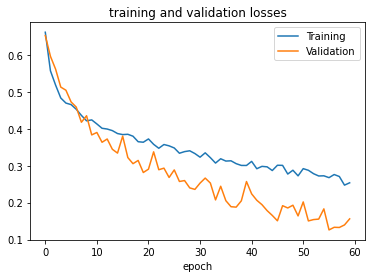

In [162]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('training and validation losses')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

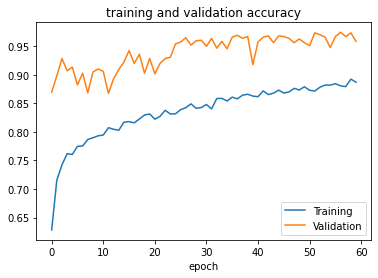

In [163]:
#plot graph between training and validation loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('training and validation accuracy')
plt.xlabel('epoch')
